In [1]:
!pip install SciencePlots -q

# Lorenz System
<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/71/Lorenz_system_r28_s10_b2-6666.png/1920px-Lorenz_system_r28_s10_b2-6666.png" width="500"/>
</div>

## Mathematical model

The model is a system of three ordinary differential equations now known as the Lorenz equations:

$$\begin{align} \dot{x} &= \sigma(y - x) \\ \dot{y} &= x(\rho -z) - y) \\ \dot{z} &= x\;y - \beta \; z \end{align}$$

In [13]:
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import solve_ivp
import scienceplots
from IPython.display import HTML


# Estilo
plt.style.use(['seaborn', 'science', 'nature','no-latex'])
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

In [14]:
# Define las ecuaciones de Lorenz
def lorenz(t, state, sigma, rho, beta):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Define los parámetros y condiciones iniciales
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

initial_state = [1.0, 0.0, 0.0]  # Condiciones iniciales: x(0) = 1.0, y(0) = 0.0, z(0) = 0.0

# Especifica el rango de tiempo
t_span = (0, 40)  # Rango de tiempo: de 0 a 40

# Resuelve las ecuaciones usando solve_ivp
sol = solve_ivp(lorenz, t_span, initial_state, args=(sigma, rho, beta), dense_output=True)

# Puntos de tiempo donde deseas las soluciones
t_eval = np.linspace(0, 40, 2000)

# Obtiene las soluciones en los puntos de tiempo t_eval
x, y, z = sol.sol(t_eval)


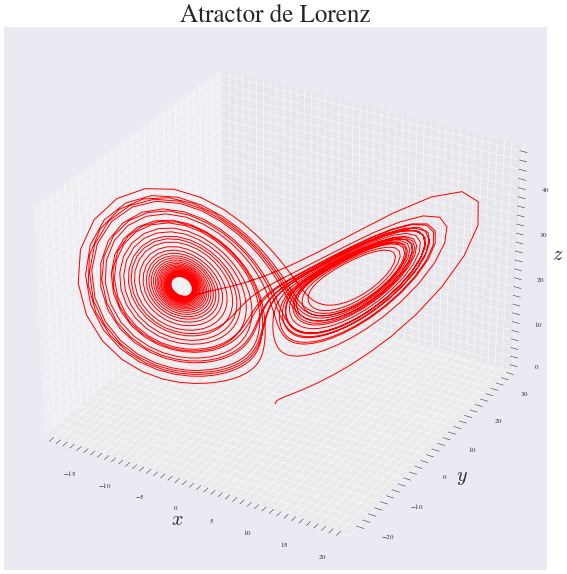

In [4]:
# Plot en 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw=1, color='r', label="Atractor de Lorenz")
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.set_zlabel(r"$z$", fontsize=20)
ax.set_title("Atractor de Lorenz", fontsize=25)
plt.savefig("Lorenz.pdf", bbox_inches='tight')
plt.show()